In [36]:
pip install openpyxl

In [8]:
import numpy as np
import pandas as pd
from scipy.stats import f
import matplotlib.pyplot as plt
import scipy.stats as stats

### Importación de los datos

In [14]:
data = pd.read_excel("Datos_examen_final_18Co2024_Grupo9.xlsx", sheet_name = None)

In [15]:
# Crear un dataframe inicial usando la columna Fecha de una de las hojas (todas tienen las mismas fechas)
df = pd.DataFrame()

# Recorrer cada hoja (supermercado) y agregar las ventas al dataframe final
for sheet_name, df_temp in data.items():
    df_temp.set_index('Fecha', inplace=True)  # Usar la columna Fecha como índice
    df[sheet_name] = df_temp['Ventas']  # Añadir la columna de Ventas de cada supermercado

In [16]:
# Resumen estadístico
print(df.describe())

# Información general del dataframe (tipo de datos, columnas, memoria)
print(df.info())

          Santa Ana   La Floresta    Los Cedros       Palermo       Córdoba
count    365.000000    365.000000    365.000000    365.000000    365.000000
mean   20990.659056  21713.716026  18068.391082  20787.278462  17900.271075
std     3080.749475   3063.659636   3068.290166   2908.004696   2989.198032
min    11333.434399  12494.913742  10039.641499  11439.713424   9436.599034
25%    18759.655091  19667.310076  15862.198550  18908.726286  15935.841871
50%    21248.570814  22016.190504  18141.253407  20952.996530  18126.591291
75%    23010.314328  23748.501730  20342.445365  22908.781807  20085.310130
max    28860.143317  28467.553378  25496.299149  28256.625698  24259.714113
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2023-01-01 to 2023-12-31
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Santa Ana    365 non-null    float64
 1   La Floresta  365 non-null    float64
 2   Los Cedros   365 non

### Entender mejor las ventas de "Santa Ana"

In [17]:
import pandas as pd

# Asegurarnos de que la columna 'Fecha' es de tipo datetime
df.index = pd.to_datetime(df.index)

# Filtrar las ventas del supermercado 'Santa Ana'
santa_ana_ventas = df['Santa Ana']

# Agrupar las ventas por mes y calcular el total de ventas mensual
ventas_mensuales = santa_ana_ventas.resample('M').sum()

# Mostrar el resumen de ventas mensuales
print(ventas_mensuales)

# También podemos mostrar el promedio de ventas por mes
ventas_mensuales_promedio = santa_ana_ventas.resample('M').mean()
print("\nPromedio de ventas mensuales de Santa Ana:")
print(ventas_mensuales_promedio)

Fecha
2023-01-31    529481.023650
2023-02-28    536518.876249
2023-03-31    681576.541441
2023-04-30    601794.701141
2023-05-31    657833.572073
2023-06-30    668856.887249
2023-07-31    646620.066712
2023-08-31    680510.638363
2023-09-30    687254.141177
2023-10-31    687400.755452
2023-11-30    666893.497568
2023-12-31    616849.854300
Freq: ME, Name: Santa Ana, dtype: float64

Promedio de ventas mensuales de Santa Ana:
Fecha
2023-01-31    17080.033021
2023-02-28    19161.388437
2023-03-31    21986.340046
2023-04-30    20059.823371
2023-05-31    21220.437809
2023-06-30    22295.229575
2023-07-31    20858.711829
2023-08-31    21951.956076
2023-09-30    22908.471373
2023-10-31    22174.217918
2023-11-30    22229.783252
2023-12-31    19898.382397
Freq: ME, Name: Santa Ana, dtype: float64


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_17928\4236359460.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ventas_mensuales = santa_ana_ventas.resample('M').sum()
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_17928\4236359460.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ventas_mensuales_promedio = santa_ana_ventas.resample('M').mean()


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_17928\1876611907.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ventas_mensuales_totales = df['Santa Ana'].resample('M').sum()
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_17928\1876611907.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ventas_mensuales_promedio = df['Santa Ana'].resample('M').mean()


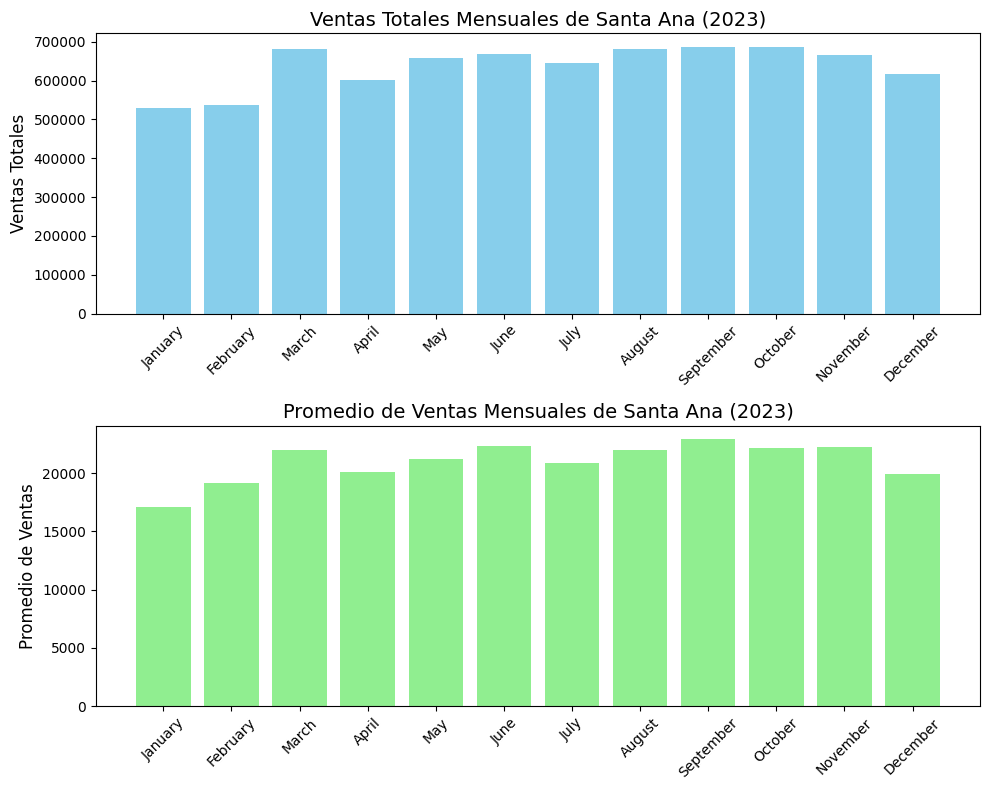

In [18]:
ventas_mensuales_totales = df['Santa Ana'].resample('M').sum()
ventas_mensuales_promedio = df['Santa Ana'].resample('M').mean()

# Obtener los nombres de los meses
meses = ventas_mensuales_totales.index.strftime('%B')

# Crear el gráfico para las ventas totales
plt.figure(figsize=(10, 8))

# Graficar las ventas totales mensuales
plt.subplot(2, 1, 1)
plt.bar(meses, ventas_mensuales_totales, color='skyblue')
plt.title('Ventas Totales Mensuales de Santa Ana (2023)', fontsize=14)
plt.ylabel('Ventas Totales', fontsize=12)
plt.xticks(rotation=45)

# Crear el gráfico para las ventas promedio mensuales
plt.subplot(2, 1, 2)
plt.bar(meses, ventas_mensuales_promedio, color='lightgreen')
plt.title('Promedio de Ventas Mensuales de Santa Ana (2023)', fontsize=14)
plt.ylabel('Promedio de Ventas', fontsize=12)
plt.xticks(rotation=45)

# Ajustar el diseño y mostrar ambos gráficos
plt.tight_layout()
plt.show()

### Ventas por supermercado

          Santa Ana   La Floresta    Los Cedros       Palermo       Córdoba
count    365.000000    365.000000    365.000000    365.000000    365.000000
mean   20990.659056  21713.716026  18068.391082  20787.278462  17900.271075
std     3080.749475   3063.659636   3068.290166   2908.004696   2989.198032
min    11333.434399  12494.913742  10039.641499  11439.713424   9436.599034
25%    18759.655091  19667.310076  15862.198550  18908.726286  15935.841871
50%    21248.570814  22016.190504  18141.253407  20952.996530  18126.591291
75%    23010.314328  23748.501730  20342.445365  22908.781807  20085.310130
max    28860.143317  28467.553378  25496.299149  28256.625698  24259.714113


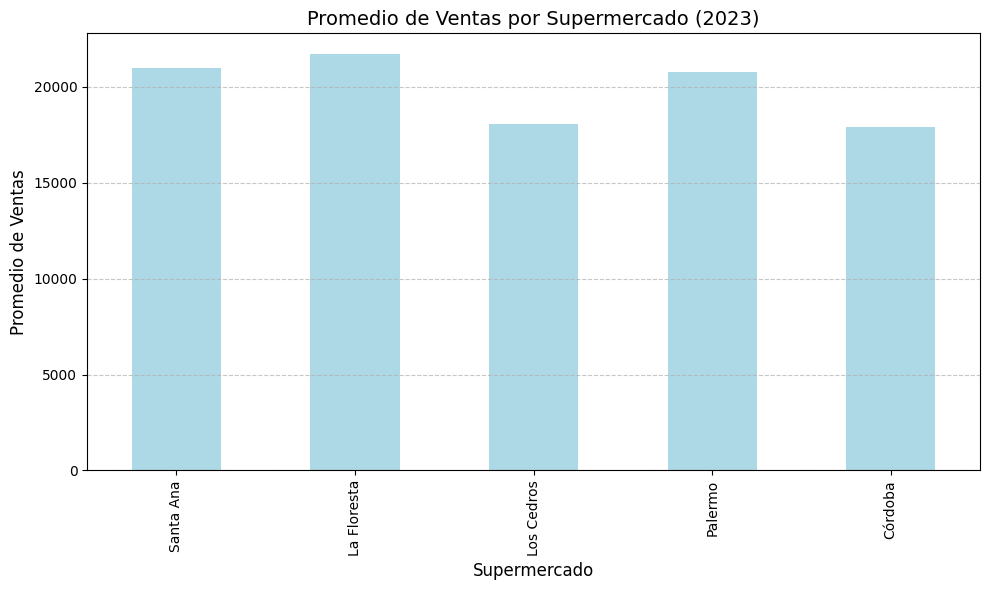

In [19]:
# Calcular el resumen estadístico (promedio, mediana, desviación estándar, etc.) de ventas por supermercado
resumen_ventas = df.describe()

# Mostrar el resumen estadístico de las ventas por supermercado
print(resumen_ventas)

# Calcular el promedio de ventas de cada supermercado
promedio_ventas = df.mean()

# Crear un gráfico de barras para los promedios de ventas
plt.figure(figsize=(10, 6))
promedio_ventas.plot(kind='bar', color='lightblue')

# Añadir títulos y etiquetas
plt.title('Promedio de Ventas por Supermercado (2023)', fontsize=14)
plt.xlabel('Supermercado', fontsize=12)
plt.ylabel('Promedio de Ventas', fontsize=12)

# Mostrar el gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Determinen intervalos de confianza empiricos para el supermercado ’Santa Ana’ en cada mes, para significancias del 95 % y el 99 %.

In [20]:
# Agrupar las ventas de Santa Ana por mes
ventas_mensuales = df['Santa Ana'].resample('M').agg(['mean', 'std', 'count'])

# Calcular el intervalo de confianza utilizando la distribución t de Student
# Para el 95% de confianza
t_95 = stats.t.ppf(0.975, df=ventas_mensuales['count'] - 1)  # Para el 95% con n-1 grados de libertad
ventas_mensuales['IC_95_lower'] = ventas_mensuales['mean'] - t_95 * (ventas_mensuales['std'] / np.sqrt(ventas_mensuales['count']))
ventas_mensuales['IC_95_upper'] = ventas_mensuales['mean'] + t_95 * (ventas_mensuales['std'] / np.sqrt(ventas_mensuales['count']))

# Para el 99% de confianza
t_99 = stats.t.ppf(0.995, df=ventas_mensuales['count'] - 1)  # Para el 99% con n-1 grados de libertad
ventas_mensuales['IC_99_lower'] = ventas_mensuales['mean'] - t_99 * (ventas_mensuales['std'] / np.sqrt(ventas_mensuales['count']))
ventas_mensuales['IC_99_upper'] = ventas_mensuales['mean'] + t_99 * (ventas_mensuales['std'] / np.sqrt(ventas_mensuales['count']))

# Mostrar los resultados
print(ventas_mensuales[['IC_95_lower', 'IC_95_upper', 'IC_99_lower', 'IC_99_upper']])

             IC_95_lower   IC_95_upper   IC_99_lower   IC_99_upper
Fecha                                                             
2023-01-31  16092.602493  18067.463549  15750.421171  18409.644871
2023-02-28  17854.315835  20468.461039  17396.387014  20926.389861
2023-03-31  21020.975441  22951.704652  20686.440779  23286.239314
2023-04-30  19109.945756  21009.700987  18779.659415  21339.987328
2023-05-31  20345.360835  22095.514783  20042.114188  22398.761429
2023-06-30  21329.911547  23260.547603  20994.256349  23596.202801
2023-07-31  19895.991677  21821.431982  19562.373416  22155.050242
2023-08-31  20921.390168  22982.521985  20564.260835  23339.651318
2023-09-30  21889.839921  23927.102824  21535.646867  24281.295879
2023-10-31  21211.753456  23136.682380  20878.223802  23470.212034
2023-11-30  21311.828744  23147.737761  20992.642534  23466.923970
2023-12-31  18984.463062  20812.301732  18667.756095  21129.008698


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_17928\6102762.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ventas_mensuales = df['Santa Ana'].resample('M').agg(['mean', 'std', 'count'])


Si se repitiera este análisis muchas veces con diferentes muestras de datos, el 95% de las veces la media verdadera estaría dentro de este intervalo.
Sin embargo, esto no significa que las ventas diarias estén entre estos valores, sino que la media de las ventas diarias del mes se espera que esté en ese rango.

### Realicen pruebas ANOVA para determinar si las ventas esperadas de todas las tiendas son iguales o no, con significancia del 95

In [21]:
# Extraer las ventas de cada supermercado
ventas_santa_ana = df['Santa Ana']
ventas_la_floresta = df['La Floresta']
ventas_los_cedros = df['Los Cedros']
ventas_palermo = df['Palermo']
ventas_cordoba = df['Córdoba']

# Realizar la prueba ANOVA
anova_result = stats.f_oneway(ventas_santa_ana, ventas_la_floresta, ventas_los_cedros, ventas_palermo, ventas_cordoba)

# Mostrar los resultados
print(f"Estadístico F: {anova_result.statistic}")
print(f"P-valor: {anova_result.pvalue}")

# Interpretación del resultado
alpha = 0.05  # Nivel de significancia del 95%
if anova_result.pvalue < alpha:
    print("Rechazamos la hipótesis nula (H0): Las ventas esperadas NO son iguales en todas las tiendas.")
else:
    print("No rechazamos la hipótesis nula (H0): Las ventas esperadas SON iguales en todas las tiendas.")

Estadístico F: 126.03672797482331
P-valor: 4.598727407234206e-95
Rechazamos la hipótesis nula (H0): Las ventas esperadas NO son iguales en todas las tiendas.


In [22]:
# Paso 1: Calcular las medias de cada tienda
mean_total = df.stack().mean()  # Media global de todas las tiendas
mean_by_store = df.mean()  # Media por cada tienda

# Paso 2: Calcular la suma de cuadrados entre los grupos (SST)
sst = sum(df.count() * (mean_by_store - mean_total) ** 2)

# Paso 3: Calcular la suma de cuadrados dentro de los grupos (SSE)
# Para SSE, necesitamos restar las medias de cada columna en su respectiva columna
sse = ((df.sub(df.mean(), axis=1)) ** 2).sum().sum()

# Paso 4: Suma total de cuadrados (SSTotal)
sstotal = sst + sse

# Paso 5: Calcular los grados de libertad
df_between = len(df.columns) - 1  # Grados de libertad entre grupos (k - 1)
df_within = df.count().sum() - len(df.columns)  # Grados de libertad dentro de los grupos (N - k)

# Paso 6: Calcular la media de cuadrados (MST y MSE)
mst = sst / df_between  # Media de cuadrados entre grupos
mse = sse / df_within  # Media de cuadrados dentro de los grupos

# Paso 7: Calcular el estadístico F
F = mst / mse

# Paso 8: Calcular el p-valor
p_value = 1 - f.cdf(F, df_between, df_within)

# Mostrar los resultados
print(f"Estadístico F: {F}")
print(f"P-valor: {p_value}")

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Las ventas esperadas NO son iguales en todas las tiendas.")
else:
    print("No rechazamos la hipótesis nula: Las ventas esperadas SON iguales en todas las tiendas.")


Estadístico F: 126.03672797482331
P-valor: 1.1102230246251565e-16
Rechazamos la hipótesis nula: Las ventas esperadas NO son iguales en todas las tiendas.


In [35]:
def scientific_to_decimal(scientific_number):
    return format(scientific_number, '.100f')

# Ejemplo con tus dos valores
p_value_1 = 1.1102230246251565e-16
p_value_2 = 4.598727407234206e-95

# Convertir a notación decimal común
decimal_1 = scientific_to_decimal(p_value_1)
decimal_2 = scientific_to_decimal(p_value_2)

print("p_value_1 en notación decimal:", decimal_1)
print("p_value_2 en notación decimal:", decimal_2)

p_value_1 en notación decimal: 0.0000000000000001110223024625156540423631668090820312500000000000000000000000000000000000000000000000
p_value_2 en notación decimal: 0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000459873


In [79]:
p_value_comun = "{:.20f}".format(p_value)
p_value_comun

'0.00000000000000011102'

### Identifiquen la tienda con mayor promedio de ventas y la tienda con menor promedio de ventas y realicen una prueba de hipotesis para determinar si la diferencia entre ellas es distinta de cero o no.

In [24]:
# Calcular el promedio de ventas de cada tienda
promedio_ventas = df.mean()

# Mostrar el promedio de ventas por tienda
print("Promedio de ventas por tienda:")
print(promedio_ventas)

# Identificar la tienda con mayor y menor promedio de ventas
tienda_max_ventas = promedio_ventas.idxmax()
tienda_min_ventas = promedio_ventas.idxmin()

print(f"La tienda con mayor promedio de ventas es: {tienda_max_ventas}")
print(f"La tienda con menor promedio de ventas es: {tienda_min_ventas}")

Promedio de ventas por tienda:
Santa Ana      20990.659056
La Floresta    21713.716026
Los Cedros     18068.391082
Palermo        20787.278462
Córdoba        17900.271075
dtype: float64
La tienda con mayor promedio de ventas es: La Floresta
La tienda con menor promedio de ventas es: Córdoba


In [25]:
# Extraer las ventas de la tienda con mayor y menor promedio de ventas
ventas_max = df[tienda_max_ventas]
ventas_min = df[tienda_min_ventas]

# Realizar la prueba t de Student para dos muestras independientes
t_stat, p_value = stats.ttest_ind(ventas_max, ventas_min, equal_var=False)

# Mostrar el resultado de la prueba
print(f"Estadístico t: {t_stat}")
print(f"P-valor: {p_value}")

# Interpretación del resultado
alpha = 0.05  # Nivel de significancia del 95%
if p_value < alpha:
    print("Rechazamos la hipótesis nula: La diferencia entre las tiendas es significativa.")
else:
    print("No rechazamos la hipótesis nula: No hay evidencia de que la diferencia entre las tiendas sea significativa.")

Estadístico t: 17.02102031303486
P-valor: 6.120639467187551e-55
Rechazamos la hipótesis nula: La diferencia entre las tiendas es significativa.


### Determinen la distribucion a posteriori del parametro p de porcentaje de morosidad. Determinar su media y su varianza.

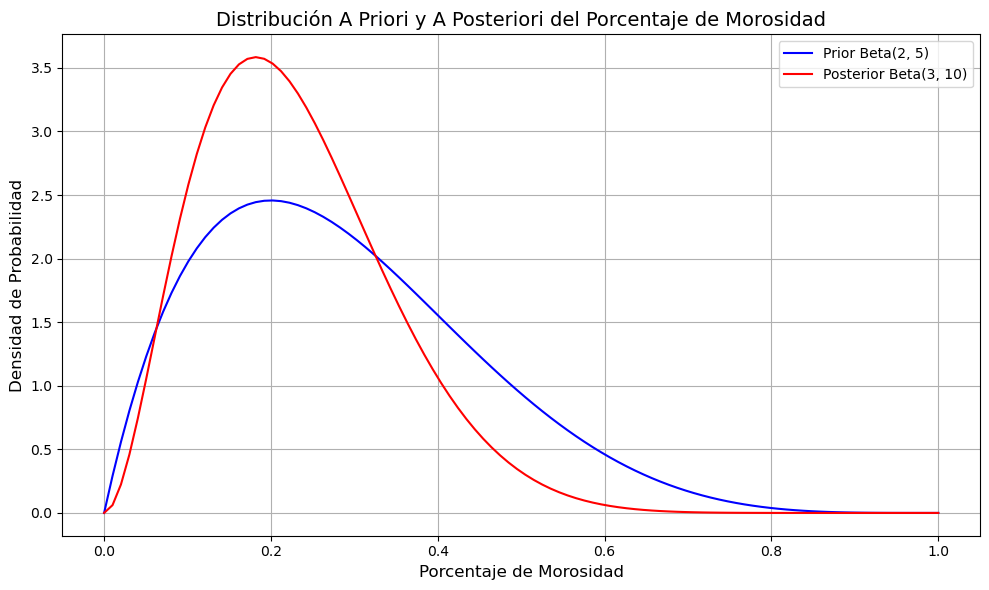

Media de la distribución posterior: 0.23076923076923078
Varianza de la distribución posterior: 0.01267962806424345


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parámetros de la distribución a priori
alpha_prior = 2
beta_prior = 5

# Datos observados
clientes_total = 6
clientes_mora = 1
clientes_no_mora = clientes_total - clientes_mora

# Actualizar los parámetros de la distribución posterior
alpha_post = alpha_prior + clientes_mora
beta_post = beta_prior + clientes_no_mora

# Crear un rango de valores para p (porcentaje de morosidad)
p = np.linspace(0, 1, 100)

# Distribución a priori
prior_dist = beta.pdf(p, alpha_prior, beta_prior)

# Distribución posterior
posterior_dist = beta.pdf(p, alpha_post, beta_post)

# Graficar la distribución a priori y posterior
plt.figure(figsize=(10, 6))
plt.plot(p, prior_dist, label=f'Prior Beta({alpha_prior}, {beta_prior})', color='blue')
plt.plot(p, posterior_dist, label=f'Posterior Beta({alpha_post}, {beta_post})', color='red')

# Añadir etiquetas y leyenda
plt.title('Distribución A Priori y A Posteriori del Porcentaje de Morosidad', fontsize=14)
plt.xlabel('Porcentaje de Morosidad', fontsize=12)
plt.ylabel('Densidad de Probabilidad', fontsize=12)
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

# Calcular la media y varianza de la distribución posterior
media_post = alpha_post / (alpha_post + beta_post)
varianza_post = (alpha_post * beta_post) / ((alpha_post + beta_post)**2 * (alpha_post + beta_post + 1))

print(f"Media de la distribución posterior: {media_post}")
print(f"Varianza de la distribución posterior: {varianza_post}")
